In [1]:
import rickpy
rickpy.use_dev_packages(['rickpy','scidash/sciunit','scidash/neuronunit','neuroml/pyNeuroML'])
import imp
imp.reload(rickpy);

In [2]:
%matplotlib notebook
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
import sciunit
import neuronunit
from neuronunit import aibs
from neuronunit.models.reduced import ReducedModel

In [3]:
# Replace this with your model path.  
# This example is from https://github.com/OpenSourceBrain/IzhikevichModel.
HOME = os.path.expanduser('~')
LEMS_MODEL_PATH = os.path.join(HOME,'Dropbox/dev/osb/IzhikevichModel/NeuroML2/LEMS_2007One.xml')

In [4]:
import quantities as pq
from neuronunit import tests as nu_tests, neuroelectro
neuron = {'nlex_id': 'nifext_50'} # Layer V pyramidal cell
tests = []

dataset_id = 354190013  # Internal ID that AIBS uses for a particular Scnn1a-Tg2-Cre 
                        # Primary visual area, layer 5 neuron.
observation = aibs.get_observation(dataset_id,'rheobase')
tests += [nu_tests.RheobaseTest(observation=observation)]
    
test_class_params = [(nu_tests.RestingPotentialTest,None),
                     (nu_tests.InputResistanceTest,None),
                     (nu_tests.InjectedCurrentAPWidthTest,{'injected_current':{'amplitude':100.0*pq.pA}}),
                     (nu_tests.InjectedCurrentAPAmplitudeTest,{'injected_current':{'amplitude':100.0*pq.pA}})]

for cls,params in test_class_params:
    observation = cls.neuroelectro_summary_observation(neuron)
    tests += [cls(observation,params=params)]
    
def update_amplitude(test,tests,score):
    rheobase = score.prediction['value']
    tests[3].params['injected_current']['amplitude'] = rheobase*1.01
    tests[4].params['injected_current']['amplitude'] = rheobase*1.01
    
hooks = {tests[0]:{'f':update_amplitude}}
suite = sciunit.TestSuite("vm_suite",tests,hooks=hooks)

Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Resting+membrane+potential
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Input+Resistance
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Spike+Half-Width
Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nes/?nlex=nifext_50&e__name=Spike+Amplitude


In [5]:
models = []
for vr in np.linspace(-75,-50,6):
    model = ReducedModel(LEMS_MODEL_PATH, 
                         name='V_rest=%dmV' % vr, 
                         attrs={'//izhikevich2007Cell':
                                    {'vr':'%d mV' % vr}
                               })
    #model.skip_run = True
    models.append(model)
score_matrix = suite.judge(models, verbose=False)
score_matrix.show_mean = True
score_matrix.sortable = True
score_matrix

Executing Rheobase test on V_rest=-75mV
Executing Resting potential test on V_rest=-75mV
Executing Input resistance test on V_rest=-75mV
Executing Injected current AP width test on V_rest=-75mV
Executing Injected current AP amplitude test on V_rest=-75mV
Executing Rheobase test on V_rest=-70mV
Executing Resting potential test on V_rest=-70mV
Executing Input resistance test on V_rest=-70mV
Executing Injected current AP width test on V_rest=-70mV
Executing Injected current AP amplitude test on V_rest=-70mV
Executing Rheobase test on V_rest=-65mV
Executing Resting potential test on V_rest=-65mV
Executing Input resistance test on V_rest=-65mV
Executing Injected current AP width test on V_rest=-65mV
Executing Injected current AP amplitude test on V_rest=-65mV
Executing Rheobase test on V_rest=-60mV
Executing Resting potential test on V_rest=-60mV
Executing Input resistance test on V_rest=-60mV
Executing Injected current AP width test on V_rest=-60mV
Executing Injected current AP amplitude t

<IPython.core.display.Javascript object>

,Mean,Rheobase,Resting potential,Input resistance,Injected current AP width,Injected current AP amplitude
V_rest=-75mV,0.561,Ratio = 0.72,Z = -0.96,Z = -0.91,Z = -0.44,Z = -0.54
V_rest=-70mV,0.701,Ratio = 1.00,Z = -0.24,Z = -0.81,Z = -0.40,Z = -0.54
V_rest=-65mV,0.653,Ratio = 1.51,Z = 0.48,Z = -0.68,Z = -0.36,Z = -0.53
V_rest=-60mV,0.560,Ratio = 2.51,Z = 1.20,Z = -0.49,Z = -0.30,Z = -0.54
V_rest=-55mV,0.519,Ratio = 4.97,Z = 1.92,Z = -0.20,Z = -0.25,Z = -0.54
V_rest=-50mV,0.445,Ratio = 13.84,Z = 2.64,Z = 0.28,Z = -0.20,Z = -0.54


<IPython.core.display.Javascript object>


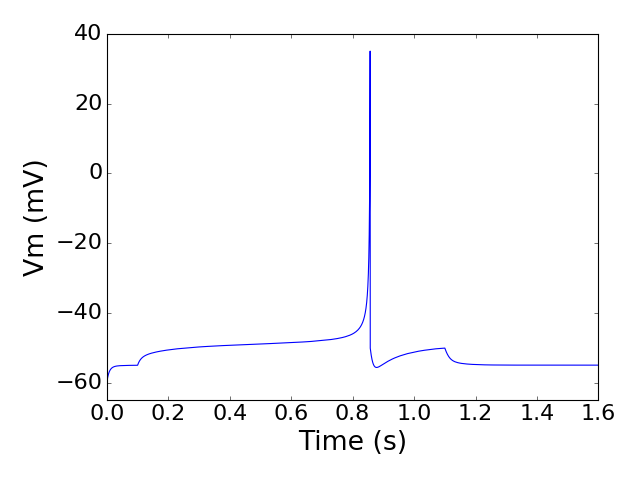

In [10]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 20
vm = score_matrix[tests[3]][4].related_data['vm'].rescale('mV') # Plot the rheobase current (test 3) 
                                                                # from v_rest = -55 mV (model 4)
ax = plt.gca()
ax.plot(vm.times,vm)
y_min = float(vm.min()-5.0*pq.mV)
y_max = float(vm.max()+5.0*pq.mV)
ax.set_xlim(0,1.6)
ax.set_ylim(y_min,y_max)
ax.set_xlabel('Time (s)',size=24)
ax.set_ylabel('Vm (mV)',size=24);
plt.tight_layout()

In [6]:
"""
for a in np.linspace(0.015,0.045,2):
    for b in np.linspace(-3.5,-0.5,2):
        for C in np.linspace(50,150,3):
            for k in np.linspace(0.4,1.0,3):
                model = ReducedModel(LEMS_MODEL_PATH, 
                             name='a=%.3fperms_b=%.1fnS_C=%dpF_k=%.2f' % (a,b,C,k), 
                             attrs={'//izhikevich2007Cell':
                                        {'b':'%.1f nS' % b,
                                         'a':'%.3f per_ms' % a,
                                         'C':'%d pF' % C,
                                         'k':'%.2f nS_per_mV' % k,
                                         'vr':'-68 mV',
                                         'vpeak':'45 mV'}
                                   })
                #model.skip_run = True
                models3.append(model)
score_matrix3 = suite.judge(models3, verbose=False)
score_matrix3.show_mean = True
score_matrix3.sortable = True
score_matrix3
""";

In [7]:
"""
models2 = []
for i,a in enumerate(np.linspace(0.015,0.045,7)):
    for j,b in enumerate(np.linspace(-3.5,-0.5,7)):
        model = ReducedModel(LEMS_MODEL_PATH, 
                     name='a=%.3fperms_b=%.1fnS' % (a,b), 
                     attrs={'//izhikevich2007Cell':
                                {'b':'%.1f nS' % b,
                                 'a':'%.3f per_ms' % a,
                                 'C':'150 pF',
                                 'k':'0.70 nS_per_mV',
                                 'vr':'-68 mV',
                                 'vpeak':'45 mV'}
                           })
        #model.skip_run = True
        models2.append(model)
score_matrix2 = suite.judge(models2, verbose=False)
score_matrix2.show_mean = True
score_matrix2.sortable = True
score_matrix2
""";

In [8]:
"""
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
heatmap = np.zeros((7,7))
for i,a in enumerate(np.linspace(0.015,0.045,7)):
    for j,b in enumerate(np.linspace(-3.5,-0.5,7)):
        for model in score_matrix2.models:
            if model.name == 'a=%.3fperms_b=%.1fnS' % (a,b):
                heatmap[i,j] = 20*(score_matrix2[model].mean() - 0.8070)+0.8070#[tests[0]].score
#heatmap[2,0] = np.nan
plt.pcolor(heatmap,cmap='magma')
plt.yticks(np.arange(7)+0.5,np.linspace(0.015,0.045,7))
plt.ylabel('Izhikevich Parameter $a$')
plt.xticks(np.arange(7)+0.5,np.linspace(-3.5,-0.5,7))
plt.xlabel('Izhikevich Parameter $b$')
cbar = plt.colorbar()
cbar.set_label('Mean Test Score',size=15)
cbar.ax.tick_params(labelsize=15) 
plt.tight_layout()
np.save('heatmap',heatmap)
""";

In [12]:
"""
from neuronunit.tests.dynamics import TFRTypeTest,BurstinessTest

is_bursty = BurstinessTest(observation={'cv_mean':1.5, 'cv_std':1.0})
score_matrix2 = is_bursty.judge(models)
score_matrix2
""";

In [13]:
"""
#rickpy.refresh_objects(locals(),modules=None)
rickpy.refresh_objects(locals().copy(),modules=['sciunit','neuronunit'])
isinstance(tests[0],sciunit.Test) # Should print True if successful
""";